<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_csv = r'C:\Users\ryant\Desktop\IOD\DATA\breast-cancer-wisconsin-data.csv'
bc = pd.read_csv(breast_cancer_csv, index_col = 0)
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


### 2. EDA

Explore dataset. Clean data. Find correlation.

In [5]:
bc.info()
#Lets drop the unnamed column

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [7]:
bc = bc.drop('Unnamed: 32', axis=1) #drop the last column with null values

In [9]:
bc.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
bc['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

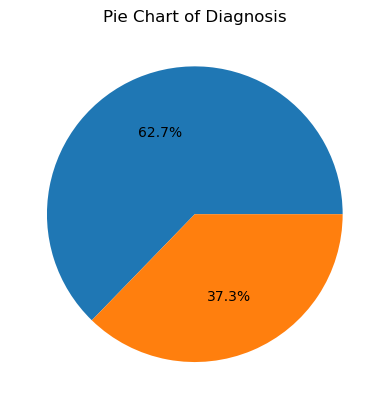

In [15]:
#Check the distribution of Benign to Malignant. There is more non-cancerous data (B).
diag_count = bc['diagnosis'].value_counts()
plt.pie(diag_count, autopct='%1.1f%%')
plt.title('Pie Chart of Diagnosis')
plt.show()

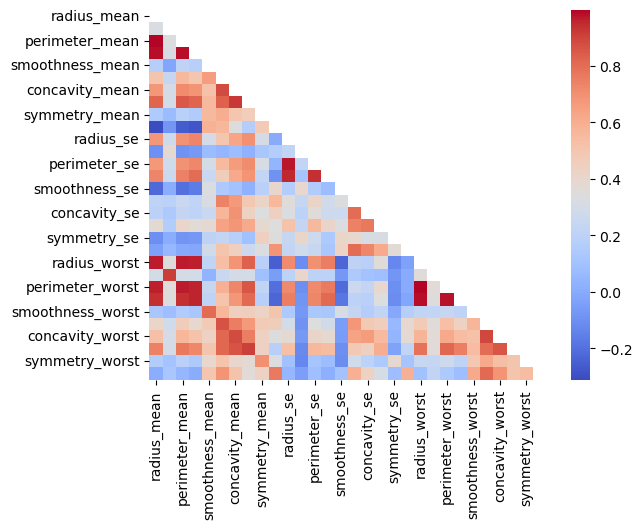

In [17]:
#heatmap of the numeric datatypes only
bc_corr = bc.select_dtypes(include='number').corr()
sns.heatmap(data=bc_corr,
            cmap='coolwarm',
            mask=np.triu(np.ones_like(bc_corr, dtype=bool)) 
           )
plt.show()

#There are too many highly correlated pairs to distinguish without feature selection

In [19]:
#Select only the mean and diagnosis features
bc_means = bc.filter(regex='_mean|diagnosis')
bc_means

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


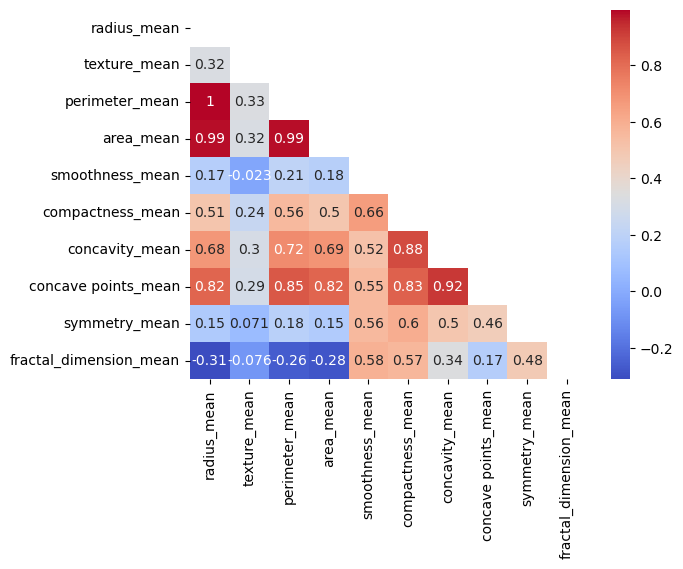

In [21]:
#Do another heatmap of just the _mean features
bcmeans_corr = bc_means.select_dtypes(include='number').corr()
sns.heatmap(data=bcmeans_corr,
            cmap='coolwarm',
            mask=np.triu(np.ones_like(bcmeans_corr, dtype=bool)),
            annot=True
           )
plt.show()

#We can now see a much more clearer picture of clearly identifying features and their correlations

In [23]:
# Compute correlation matrix and correlated pairs in decending order
corr_matrix = bc_means.select_dtypes(include='number').corr()
corr_pairs = corr_matrix.abs().unstack()  # absolute value of correlations
corr_pairs = corr_pairs[corr_pairs > 0.9]  # remove self-correlations
sorted_pairs = corr_pairs.sort_values(ascending=False).drop_duplicates()
sorted_pairs

#top correlated pairs to potentially drop

radius_mean     radius_mean            1.000000
                perimeter_mean         0.997855
area_mean       radius_mean            0.987357
                perimeter_mean         0.986507
concavity_mean  concave points_mean    0.921391
dtype: float64

In [25]:
bc.select_dtypes(include='number').std().sort_values(ascending=False)
#area and perimeter seem to deviate the furthest from their means

area_worst                 569.356993
area_mean                  351.914129
area_se                     45.491006
perimeter_worst             33.602542
perimeter_mean              24.298981
texture_worst                6.146258
radius_worst                 4.833242
texture_mean                 4.301036
radius_mean                  3.524049
perimeter_se                 2.021855
texture_se                   0.551648
radius_se                    0.277313
concavity_worst              0.208624
compactness_worst            0.157336
concavity_mean               0.079720
concave points_worst         0.065732
symmetry_worst               0.061867
compactness_mean             0.052813
concave points_mean          0.038803
concavity_se                 0.030186
symmetry_mean                0.027414
smoothness_worst             0.022832
fractal_dimension_worst      0.018061
compactness_se               0.017908
smoothness_mean              0.014064
symmetry_se                  0.008266
fractal_dime

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [87]:
y = bc['diagnosis']
#there are 2 classes

### 4. What is the baseline accuracy?

In [89]:
y.value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [91]:
bc_means.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [33]:
features = []
excl_features = ['diagnosis' , 'radius_mean' , 'perimeter_mean' , 'concavity_mean'] #highly correlated features to be excluded

#for loop to efficiently select features
for column in bc_means.columns:
    if column not in excl_features:
        features.append(column)

features

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [35]:
X = bc_means[features]
X

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,
842302,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871
842517,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667
84300903,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999
84348301,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744
84358402,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...
926424,22.39,1479.0,0.11100,0.11590,0.13890,0.1726,0.05623
926682,28.25,1261.0,0.09780,0.10340,0.09791,0.1752,0.05533
926954,28.08,858.1,0.08455,0.10230,0.05302,0.1590,0.05648


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knc = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
knc.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
It seems to be 100% accurate
- Is it legitimate?
No

In [48]:
from sklearn import metrics

In [50]:
# predict the response values for the observations in X ("test the model")
knc.predict(X)
# store the predicted response values
y_pred_knc = knc.predict(X)
# use this to compute the accuracy
metrics.accuracy_score(y, y_pred_knc)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [52]:
from sklearn.model_selection import train_test_split

In [105]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7, train_size=0.8)
# STEP 2: train the model on the training set (using K=1)
knc.fit(X_train, y_train)
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_knc = knc.predict(X_test)

In [111]:
metrics.accuracy_score(y_test, y_pred_knc)

0.9035087719298246

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [115]:
X_train.shape[0]

455

In [121]:
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knc_r = KNeighborsClassifier(n_neighbors=X_train.shape[0])
# Fit Train Data
knc_r.fit(X_train, y_train)
y_pred_kncr = knc_r.predict(X_test)
# Print accuracy_score
metrics.accuracy_score(y_test, y_pred_kncr)

0.6491228070175439

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [140]:
K = np.arange(1 ,X_train.shape[0] + 1 )
K

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [147]:
# plot test accuracy by number of neighbors:
test_accuracy = []

for i in K:
    knc = KNeighborsClassifier(n_neighbors=i) #where i is iterated K
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    test_accuracy.append(score)


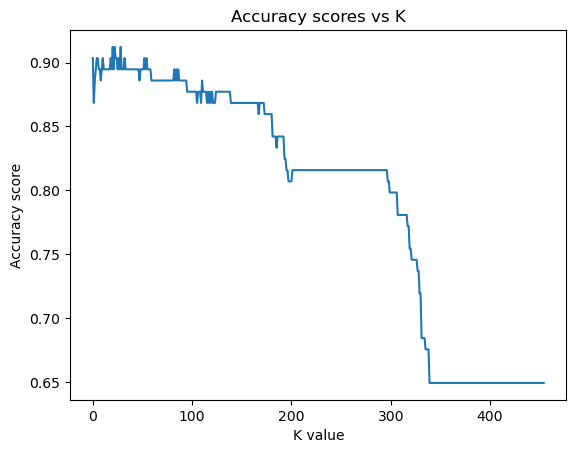

In [159]:

sns.lineplot(data=test_accuracy)
plt.title('Accuracy scores vs K')
plt.xlabel('K value')
plt.ylabel('Accuracy score')
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [162]:
from sklearn.model_selection import cross_val_score

In [200]:
folds = 5
max_k = np.floor(X.shape[0] - X.shape[0] / folds)
max_k

455.0

In [228]:
cv_accuracy = []

In [230]:
for i in range(1, int(max_k)):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=folds) #Coss validaton automatically fits, predicts and computes accuracy
    cv_accuracy.append(np.mean(score))

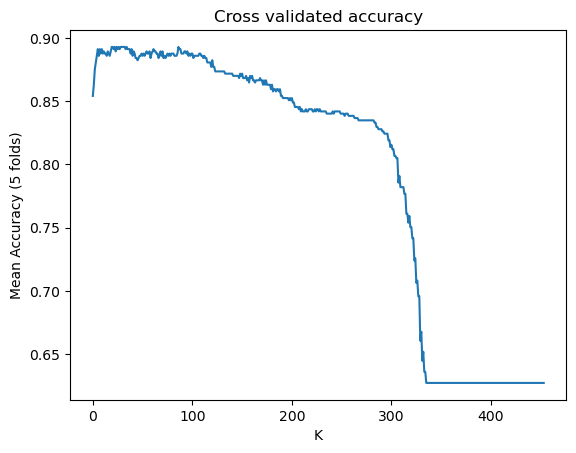

In [242]:
sns.lineplot(data=cv_accuracy)
plt.title('Cross validated accuracy')
plt.xlabel('K')
plt.ylabel('Mean Accuracy (5 folds)')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [249]:
# Standarize X
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)

In [253]:
# ANSWER
# plot test accuracy by number of neighbors:
cv_acc_std = []

for i in range(1, int(max_k)):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, Xss, y, cv=folds) #Coss validaton automatically fits, predicts and computes accuracy
    cv_acc_std.append(np.mean(score))

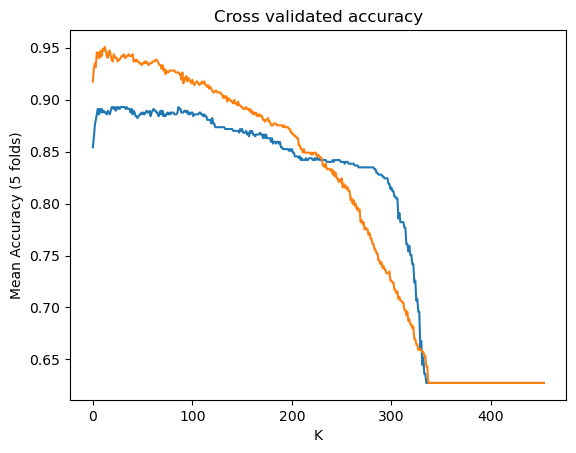

In [255]:
sns.lineplot(data=cv_accuracy)
sns.lineplot(data=cv_acc_std)
plt.title('Cross validated accuracy')
plt.xlabel('K')
plt.ylabel('Mean Accuracy (5 folds)')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



